<b> Проект: Аналитика в авиакомпании.</b>

Запрос от бизнеса: «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления. Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

<b> Содержание:</b>
1. [Импорт файлов](##step1)  
2. [Изучение данных](##step2)
3. [Проверка типов данных на корректность](##step3)
4. [Отбор топ-10 городов по количеству рейсов](##step4)
5. [Построение графиков](##step5)
6. [Выводы по каждому графику и пояснение результата](##step6)


<b>1. Импорт файлов<a id='#step1'></a></b>

In [1]:
import pandas as pd
import seaborn as sns

models = pd.read_csv('/datasets/query_1.csv')#, sep="\t")
cities = pd.read_csv('/datasets/query_3.csv')

def table_info():
    for table in [models, cities]:
        print(table.info())
        print(table.head(2))
        print('______________________________________________________________')

table_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None
             model  flights_amount
0  Airbus A319-100             607
1  Airbus A321-200             960
______________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None
      city  average_flights
0   Абакан         3.870968
1  Анадырь         1.000000
______________________________________________________________


<b>2. Изучение данных<a id='#step2'></a></b>

Итак, имее две таблицы. В в каждой таблице по два столбца. В перовй содержится 8 строк, во второй 101 строка. Пропусков в данных нет, как видно из info. Заголовки столбцов выглядят корректно, все в одном регистре, не содержат лишних пробелов и передают смысл информации в столбце, т.е. доработки не требуют.

<b>3. Проверка типов данных на корректность<a id='#step3'></a></b>

Все типы данных в таблицах корректны, кроме одного - среднее количество рейсов в день в каждый город в таблице "города". Здесь использован тип float, уберем лишние знаки после запятой, оставим два знака.

In [2]:
cities['average_flights']= cities['average_flights'].round(2)
cities.info()
cities.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


Теперь в столбце "average_flights" целочисленные значения.

<b>4. Отбор топ-10 городов по количеству рейсов<a id='#step4'></a></b>

In [3]:
top_cities = cities.sort_values(by = 'average_flights', ascending = False).head(10)
top_cities

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


Дополнительно отсортируем самолеты по количесву рейсов:

In [4]:
top_mod = models.sort_values(by = 'flights_amount', ascending = False)
top_mod

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


<b> 5. Построение графиков:<a id='#step5'></a></b>
города и количество рейсов, топ-10 городов и количество рейсов, модели самолетов и количество рейсов.

In [5]:
def graf(tab,col1,col2,name):
    df = tab.sort_values(by = col2, ascending = False).reset_index()
    df.plot.bar(x=col1, y=col2, figsize=(20,7),
                    grid=True, title=name);

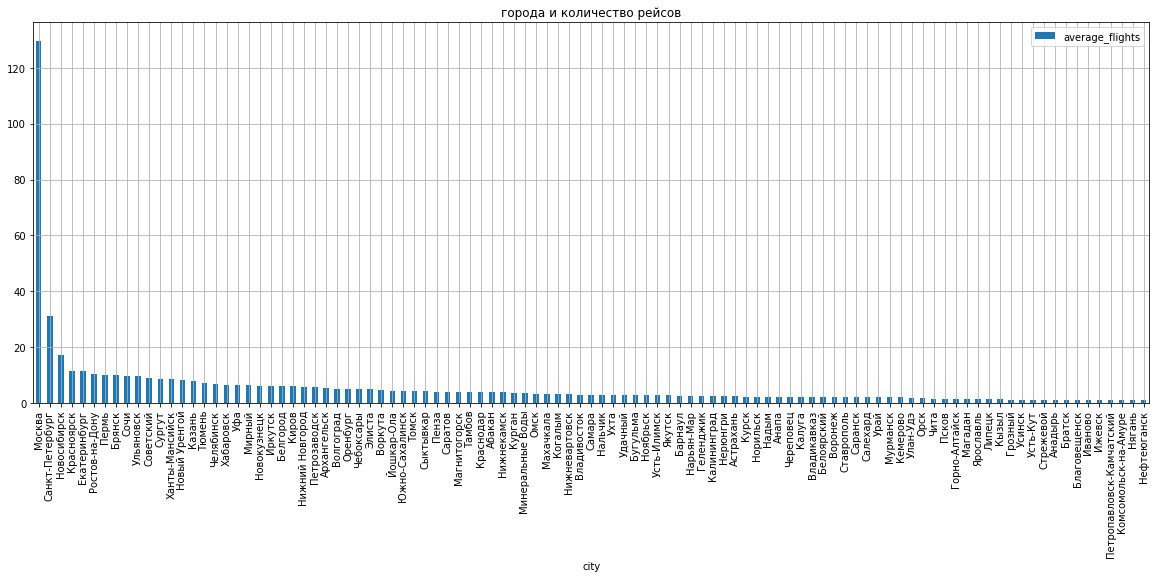

In [6]:
graf(cities,'city','average_flights', 'города и количество рейсов')

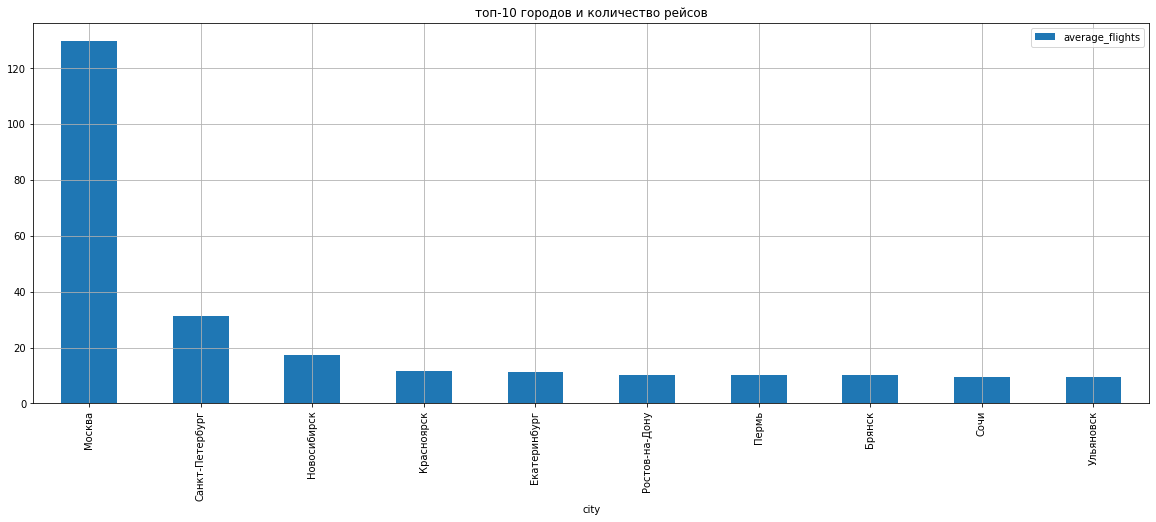

In [7]:
graf(top_cities,'city','average_flights', 'топ-10 городов и количество рейсов')

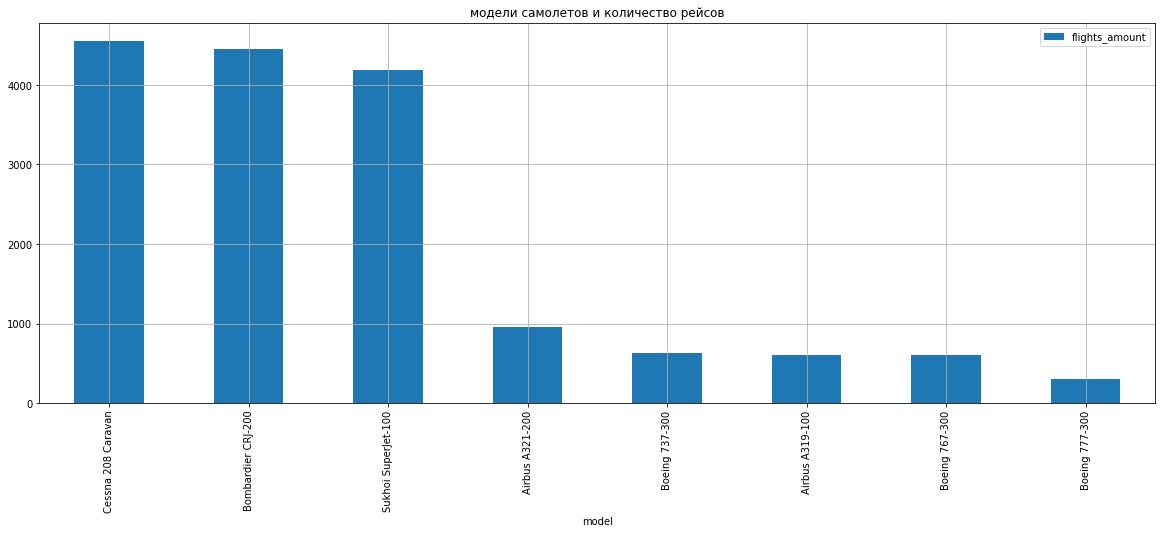

In [8]:
graf(models,'model','flights_amount', 'модели самолетов и количество рейсов')

<b> 6. Выводы по каждому графику и пояснение результата<a id='#step6'></a></b>

По количеству рейсов в различные города лидирует Москва с большим отрывом от остальных городов - более чем в 4,5 раза, что логично, поскольку это столица. На втором месте Санкт-Петербург с 31 рейсом, а третье место занимает Новосибирск, куда летает почти в два раза меньше рейсов, чем в Питер - 17. В первую десятку вошли города:
* Москва	129.77
* Санкт-Петербург	31.16
* Новосибирск	17.32
* Красноярск	11.58
* Екатеринбург	11.32
* Ростов-на-Дону	10.19
* Пермь	10.13
* Брянск	10.00
* Сочи	9.61
* Ульяновск	9.58

В дальнейшем списке идет постепенное уменьшение количества полетов, а начиная с города Усть-Кут и вовсе по одному в день. Для более глубокого анализа в отдельном исследовании можно было бы для примера сравнить количество полетов с георгафией расположения города на карте и размером населения.

Что касается моделей самолетов, то количество совершаемых ими полетов расположилось в таком порядке:
* Cessna 208 Caravan	4557
* Bombardier CRJ-200	4446
* Sukhoi SuperJet-100	4185
* Airbus A321-200	960
* Boeing 737-300	630
* Airbus A319-100	607
* Boeing 767-300	600
* Boeing 777-300	300

Как видим, самое большое количество рейсов совершает самолет Cessna 208 Caravan	4557, который используется на малых расстояниях и вмещает всего до 13 пассажиров. На втором месте Bombardier CRJ-200, вместимостью 40-50 человек, а за ним следует Sukhoi SuperJet-100, ктороый может перевозить не более 108 пассажиров. Все эти три самолета имеют дальность полетов не более 5тыс.км., а по пассажировместимости почти сопоставимы с автобусами дальнего следования, которые вмещают до 60 пассажиров. Здесь, при наличии дополнительной информации, интересно было бы посмотреть в каких регионах больше всего таких рейсов. Также, возможно, такие самолеты совершают рейсы с большим количеством пересадок.
Заметно также, что количество рейсов для первой тройки более чем в 4 раза превышает остальные самолеты.

Те, кто расположился ниже 4 места имеют меньшее количество полетов. Это можно объяснить двумя причинами:
во-первых эти самолеты имеют значительно большую дальность полета, а значит один рейс попросту занимает больше времени и их не может быть очень много,
а во-вторых, как видим, ближе к концу списка находятся самые дорогие самоелеты, а значит их возможно просто меньше в наличии у авиакомпаний, а также билеты могут стоить на них дороже. Это также повод для дополнительного анализа при необходимости и наличии информации.